In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import autoreload
%load_ext autoreload
%autoreload 2

In [2]:
#Imports work, this is saved in Users\efann bc that's where the Anaconda Powershell was looking (I had been using Windows Commnad prompt)

In [3]:
snap07 = pd.read_spss(r'C:\Users\efann\Desktop\SNAP\qc_pub_fy2007.sav')

In [4]:
snap07.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
snap07.shape

(47469, 769)

In [6]:
snap07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47469 entries, 0 to 47468
Columns: 769 entries, FSAFIL1 to NDISCA16
dtypes: float64(769)
memory usage: 278.5 MB


In [7]:
snap07.isnull().sum()

FSAFIL1         0
FSAFIL2     20739
FSAFIL3     29470
FSAFIL4     36884
FSAFIL5     42301
            ...  
NDISCA12    47455
NDISCA13    47463
NDISCA14    47466
NDISCA15    47469
NDISCA16    47469
Length: 769, dtype: int64

In [8]:
snap17 = pd.read_csv(r'C:\Users\efann\Desktop\SNAP\qc_pub_fy2017.csv')

In [9]:
snap17.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID,STATENAME
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
4,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Connecticut


In [10]:
snap17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45530 entries, 0 to 45529
Columns: 814 entries, FSAFIL1 to STATENAME
dtypes: float64(368), int64(445), object(1)
memory usage: 282.8+ MB


In [11]:
snap17.isnull().sum()

FSAFIL1          0
FSAFIL2      22368
FSAFIL3      30458
FSAFIL4      36350
FSAFIL5      40801
             ...  
FSNONCIT         0
FSDIS            0
FSELDER          0
FSKID            0
STATENAME        0
Length: 814, dtype: int64

In [12]:
#2007: 1= Eligible, 2= Not eligible (this is from the technical doc with the data)
snap07['CAT_ELIG'].value_counts()

2.0    25134
1.0    22335
Name: CAT_ELIG, dtype: int64

In [13]:
#2017 0= Not eligible, 1= Reported eligible 2= Recorded eligible

In [14]:
snap17['CAT_ELIG'].value_counts()

1    36223
0     7012
2     2295
Name: CAT_ELIG, dtype: int64

In [15]:
#The target variables in both data sets need to be changed so they are looking at the correct records, so 0= Not Eligible and 1= Eligible; that means 2007's data set values need the 2's changed to a 0 and 2017's data needs the 2 changed into a 1
snap07['CAT_ELIG']=snap07['CAT_ELIG'].replace(2,0)
snap17['CAT_ELIG']=snap17['CAT_ELIG'].replace(2,1)

In [16]:
#now i will check the values for both again, we should have only 0= not eligable and 1= eligiable
snap07['CAT_ELIG'].value_counts()

0.0    25134
1.0    22335
Name: CAT_ELIG, dtype: int64

In [17]:
snap17['CAT_ELIG'].value_counts()

1    38518
0     7012
Name: CAT_ELIG, dtype: int64

In [18]:
#the not eligables from the 2007 data set (originally 2) are now displayed as 0 which matches how we want our not eligable catagory to be labeled as.  The 2017 data had two sets of eligable (reported and recorded eligable) but we want them all to just be eligable so the 2 values (recorded eligable) match the 1 value and are displayed as 1= eligible 

In [19]:
#Now i will make extract the new mexico records and save them as a csv file; one for 07 and one for 17
nm07=snap07.loc[snap07['STATE']==35].astype('float64')
nm07_target=nm07['CAT_ELIG']
nm07.to_csv(r'C:\Users\efann\nm07.csv',index=None)

In [20]:
nm17=snap17.loc[snap17['STATE']==35]
nm17_target=nm17['CAT_ELIG']
nm17=nm17.drop(columns=['STATENAME'])
nm17=nm17.astype('float64')
nm17.to_csv(r'C:\Users\efann\nm17.csv',index=None)

In [21]:
#Here I will pull the cleaned nm data back into the notebook, this is the New Mexico DataFrame
df_nm07=pd.read_csv(r'C:\Users\efann\nm07.csv')
df_nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_nm17=pd.read_csv(r'C:\Users\efann\nm17.csv')
df_nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [23]:
#Same for the 07 and 17 Nebraska data
ne07=snap07.loc[snap07['STATE']==31].astype('float64')
ne07_target=ne07['CAT_ELIG']
ne07.to_csv(r'C:\Users\efann\ne07.csv',index=None)

In [24]:
ne17=snap17.loc[snap17['STATE']==31]
ne17_target=ne17['CAT_ELIG']
ne17=ne17.drop(columns=['STATENAME'])
ne17=ne17.astype('float64')
ne17.to_csv(r'C:\Users\efann\ne17.csv',index=None)

In [25]:
#Here is the cleaned Nebraska data, this is the Nebraska DataFrame
df_ne07=pd.read_csv(r'C:\Users\efann\ne07.csv')
df_nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_ne17=pd.read_csv(r'C:\Users\efann\ne17.csv')
df_nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [27]:
df_ne07['CAT_ELIG'].value_counts()

0.0    505
1.0    286
Name: CAT_ELIG, dtype: int64

In [28]:
df_ne17['CAT_ELIG'].value_counts()

1.0    894
Name: CAT_ELIG, dtype: int64

In [29]:
df_nm07['CAT_ELIG'].value_counts()

0.0    813
1.0    442
Name: CAT_ELIG, dtype: int64

In [30]:
df_nm17['CAT_ELIG'].value_counts()

1.0    964
Name: CAT_ELIG, dtype: int64

In [31]:
#I added the value counts for NM here to make comparison easier.  Why are we adding the 0 and 1 values together in 2007, 0=not eligible?

In [32]:
with pd.option_context('display.max_rows', None):
    print(df_nm07.isnull().sum().sort_values(ascending=False)[:96])

NDISCA16    1255
CTZN15      1255
WRKREG13    1255
WRKREG14    1255
WRKREG15    1255
VERIF9      1255
VERIF8      1255
VERIF7      1255
VERIF6      1255
AGE16       1255
AGE15       1255
AGE14       1255
AGE13       1255
WRKREG16    1255
YRSED13     1255
YRSED14     1255
YRSED15     1255
YRSED16     1255
DISCOV9     1255
DISCOV8     1255
DISCOV7     1255
DISCOV6     1255
REL16       1255
TIMEPER8    1255
REL14       1255
CTZN16      1255
CTZN14      1255
ABWDST13    1255
SEX13       1255
TIMEPER6    1255
TIMEPER9    1255
RACETH16    1255
E_FINDG6    1255
E_FINDG7    1255
FSUN13      1255
FSUN14      1255
FSUN15      1255
FSUN16      1255
RACETH15    1255
RACETH14    1255
RACETH13    1255
E_FINDG8    1255
E_FINDG9    1255
EMPSTB13    1255
CTZN13      1255
OCCDATE9    1255
OCCDATE8    1255
OCCDATE7    1255
OCCDATE6    1255
SEX16       1255
SEX15       1255
SEX14       1255
REL13       1255
REL15       1255
ABWDST14    1255
NATURE8     1255
NATURE6     1255
EMPSTA13    1255
EMPSTA14    12

In [33]:
#We identified the columns that were all null values (there were 96 of them), now we're going to turn them into their own dataframe, make it so we can pivot the table to make a list, and use that list to remove those columns
first_cut = df_nm07.isnull().sum().sort_values(ascending=False)[:96]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#This is the removal code, we use axis 1 so it doesn't look at the very first column which are our unique ID numbers
nm07 = df_nm07.drop(fc_list,axis=1)
nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA3,NDISCA4,NDISCA5,NDISCA6,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
with pd.option_context('display.max_rows', None):
    print(df_nm17.isnull().sum().sort_values(ascending=False)[:165])

DPCOST15    964
SEX12       964
OCCDATE8    964
CTZN10      964
FSUN16      964
FSUN15      964
FSUN14      964
FSUN13      964
FSUN12      964
FSUN11      964
FSUN10      964
OCCDATE9    964
CTZN11      964
CTZN12      964
CTZN13      964
CTZN14      964
CTZN15      964
CTZN16      964
TIMEPER4    964
TIMEPER5    964
TIMEPER6    964
TIMEPER7    964
TIMEPER8    964
TIMEPER9    964
YRSED10     964
OCCDATE7    964
OCCDATE6    964
DIS10       964
RACETH11    964
SEX14       964
SEX15       964
SEX16       964
VERIF4      964
VERIF5      964
VERIF6      964
VERIF7      964
VERIF8      964
VERIF9      964
RACETH10    964
RACETH12    964
DIS11       964
RACETH13    964
RACETH14    964
RACETH15    964
RACETH16    964
OCCDATE4    964
OCCDATE5    964
DIS15       964
DIS14       964
DIS13       964
DIS12       964
YRSED11     964
YRSED12     964
YRSED13     964
DPCOST16    964
EMPSTB14    964
EMPSTB15    964
EMPSTB16    964
WRKREG10    964
WRKREG11    964
WRKREG12    964
WRKREG13    964
WRKREG14

In [35]:
#Do the same thing for nm17
first_cut = df_nm17.isnull().sum().sort_values(ascending=False)[:165]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#removal code to get rid of columns with only null vaues in nm17
nm17 = df_nm17.drop(fc_list,axis=1)
nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,REL1,...,WORK4,WORK5,WORK6,WORK7,WORK8,WORK9,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [36]:
with pd.option_context('display.max_rows', None):
    print(df_ne07.isnull().sum().sort_values(ascending=False)[:144])

NDISCA16    791
FSUN12      791
DISCOV9     791
EMPSTB16    791
E_FINDG9    791
E_FINDG8    791
E_FINDG7    791
E_FINDG6    791
RACETH10    791
RACETH11    791
RACETH12    791
RACETH13    791
RACETH14    791
RACETH15    791
FSUN16      791
FSUN15      791
FSUN14      791
DISCOV8     791
DISCOV7     791
SEX16       791
EMPSTA12    791
AGE16       791
EMPSTA16    791
EMPSTA15    791
EMPSTA14    791
EMPSTA13    791
DISCOV6     791
EMPSTA11    791
SEX15       791
EMPSTA10    791
SEX10       791
SEX11       791
SEX12       791
SEX13       791
SEX14       791
FSUN13      791
FSUN11      791
AGE13       791
FSUN10      791
OCCDATE7    791
CTZN12      791
CTZN13      791
CTZN14      791
CTZN15      791
CTZN16      791
OCCDATE8    791
OCCDATE9    791
YRSED15     791
YRSED14     791
YRSED13     791
YRSED12     791
YRSED11     791
TIMEPER6    791
TIMEPER7    791
OCCDATE6    791
CTZN11      791
CTZN10      791
VERIF8      791
EMPRG16     791
EMPRG15     791
EMPRG14     791
EMPRG13     791
VERIF6  

In [37]:
#Do the same thing for ne07
first_cut = df_ne07.isnull().sum().sort_values(ascending=False)[:144]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#removal code to get rid of columns with only null vaues in ne07
ne07 = df_ne07.drop(fc_list,axis=1)
ne07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,REL1,...,FSNDISCA,NDISCA1,NDISCA2,NDISCA3,NDISCA4,NDISCA5,NDISCA6,NDISCA7,NDISCA8,NDISCA9
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
787,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
788,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
with pd.option_context('display.max_rows', None):
    print(df_ne17.isnull().sum().sort_values(ascending=False)[:91])

EMPSTA15    894
EMPSTB16    894
EMPRG14     894
EMPRG15     894
EMPRG16     894
EMPSTA14    894
EMPSTA16    894
EMPSTB14    894
EMPSTB15    894
DPCOST16    894
YRSED16     894
DPCOST15    894
DPCOST14    894
ABWDST16    894
ABWDST15    894
ABWDST14    894
WRKREG16    894
WRKREG15    894
NATURE6     894
YRSED15     894
AGE14       894
CTZN14      894
AGE16       894
SEX14       894
SEX15       894
SEX16       894
RACETH14    894
RACETH15    894
RACETH16    894
CTZN15      894
YRSED14     894
CTZN16      894
DIS16       894
DIS15       894
DIS14       894
FSUN16      894
FSUN15      894
FSUN14      894
WRKREG14    894
ELEMENT5    894
E_FINDG9    894
ELEMENT9    894
DISCOV8     894
DISCOV7     894
DISCOV6     894
DISCOV5     894
ELEMENT6    894
ELEMENT7    894
ELEMENT8    894
NATURE5     894
E_FINDG8    894
AGENCY9     894
AGENCY8     894
AGENCY7     894
AGENCY6     894
AGENCY5     894
NATURE9     894
NATURE8     894
DISCOV9     894
VERIF5      894
VERIF6      894
VERIF7      894
E_FINDG7

In [39]:
#Do the same thing for ne17
first_cut = df_ne17.isnull().sum().sort_values(ascending=False)[:91]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#removal code to get rid of columns with only null vaues in ne17
ne17 = df_ne17.drop(fc_list,axis=1)
ne17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK8,WORK9,WORK10,WORK11,WORK12,WORK13,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
891,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
892,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [40]:
#Now we will remove columns that don't have enough data in them to be meaningful.  Columns with 50% or less data will be removed.

In [41]:
dict_df = {'nm07':nm07,'nm17':nm17,'ne07':ne07,'ne17':ne17}

In [42]:
#The code above gives names to each of our rows, the code below tells what text to actually write and to calculate what 50% is for each data set (they all have different rows amounts so their 50% marks will be different)
for key, value in dict_df.items():
    print(f'50% mark for high nullitary columns:')
    print(f'{key}: {round(value.shape[0]/2)}')

50% mark for high nullitary columns:
nm07: 628
50% mark for high nullitary columns:
nm17: 482
50% mark for high nullitary columns:
ne07: 396
50% mark for high nullitary columns:
ne17: 447


In [43]:
#name= the file with the data we made earlier, rows= how many rows the file has, threshold=50% mark and start_col= how many columns we currently have
all_df_att = pd.DataFrame(dict_df.keys(), columns = ['name'])
all_df_att['rows'] = [value.shape[0] for key,value in dict_df.items()]
all_df_att['threshold'] = [round(value.shape[0]/2) for key, value in dict_df.items()]
all_df_att['start_col'] = [value.shape[1] for key,value in dict_df.items()]
all_df_att

,name,rows,threshold,start_col
0,nm07,1255,628,673
1,nm17,964,482,648
2,ne07,791,396,625
3,ne17,894,447,722


In [44]:
#NM 07 counting nulls, we first count up the sum of the nulls, then pull the ones that are HIGHER than the 628 threshold, that means more than 50% of the data is null.  We turn that into a list in preperation to get rid of those columns.
null_counts = nm07.isnull().sum()
nulls = null_counts[null_counts>628]
sc_list = list(nulls.index)

In [45]:
#NM 07 actually removing the nulls, using the list in the last cell and adding a end_col to our table to show us how many columns are left (these are columns that have>50% of the data filled in)
nm07 = nm07.drop(sc_list,axis=1)
all_df_att['end_col'] = nm07.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,471
2,ne07,791,396,625,471
3,ne17,894,447,722,471


In [46]:
#NM17 counting nulls, based on our earlier findings the 50% mark for this data set is 482
null_counts = nm17.isnull().sum()
nulls = null_counts[null_counts>482]
sc_list = list(nulls.index)

#NM17 removing nulls, anything that was on our list, columns with null counts higher than 482
nm17 = nm17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='nm17',['end_col']] = nm17.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,497
2,ne07,791,396,625,471
3,ne17,894,447,722,471


In [47]:
#NE07 counting nulls, based on our earlier findings the 50% mark for this data set is 396
null_counts = ne07.isnull().sum()
nulls = null_counts[null_counts>396]
sc_list = list(nulls.index)

#NE07 removing nulls, anything that was on our list, columns with null counts higher than 396
ne07 = ne07.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne07',['end_col']] = ne07.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,497
2,ne07,791,396,625,472
3,ne17,894,447,722,471


In [48]:
#NE17 counting nulls, based on our earlier findings the 50% mark for this data set is 447
null_counts = ne17.isnull().sum()
nulls = null_counts[null_counts>447]
sc_list = list(nulls.index)

#NE17 removing nulls, anything that was on our list, columns with null counts higher than 447
ne17 = ne17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne17',['end_col']] = ne17.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,497
2,ne07,791,396,625,472
3,ne17,894,447,722,497


In [49]:
#Copy and pasted this custom code from py_scripts folder (Decca10 on Github)
def impute_df(df):
    """Returns a dataframe with mean imputed values for NaN."""
    my_imputer = SimpleImputer(missing_values=np.nan)
    data_with_imputed_values = pd.DataFrame(my_imputer.fit_transform(df),columns = df.columns)
    return data_with_imputed_values

In [50]:
nm07 = impute_df(nm07)
nm17 = impute_df(nm17)
ne07 = impute_df(ne07)
ne17 = impute_df(ne17)

In [51]:
#Copy and pasted this custom code from py_scripts folder (Decca10 on Github)
def only_zero(df):
    """Drops all columns that are all zero values and returns a Dataframe."""
    filter = pd.DataFrame(df.sum(axis=0)==0, columns=['value'])
    filter = filter.loc[filter['value']==True]
    col = list(filter.index)
    return df.drop(col,axis=1)

In [52]:
nm07 = only_zero(nm07)
nm17 = only_zero(nm17)
ne07 = only_zero(ne07)
ne17 = only_zero(ne17)

In [53]:
all_df_att['orig'] = 0
all_df_att['final_col']=0

all_df_att.loc[all_df_att['name']=='nm07',['orig']] = df_nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['orig']] = df_nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['orig']] = df_ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['orig']] = df_ne17.shape[1]

all_df_att.loc[all_df_att['name']=='nm07',['final_col']] = nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['final_col']] = nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['final_col']] = ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['final_col']] = ne17.shape[1]

In [54]:
all_df_att.set_index('name')

,rows,threshold,start_col,end_col,orig,final_col
name,,,,,,
nm07,1255,628,673,471,769,176
nm17,964,482,648,497,813,172
ne07,791,396,625,472,769,172
ne17,894,447,722,497,813,172


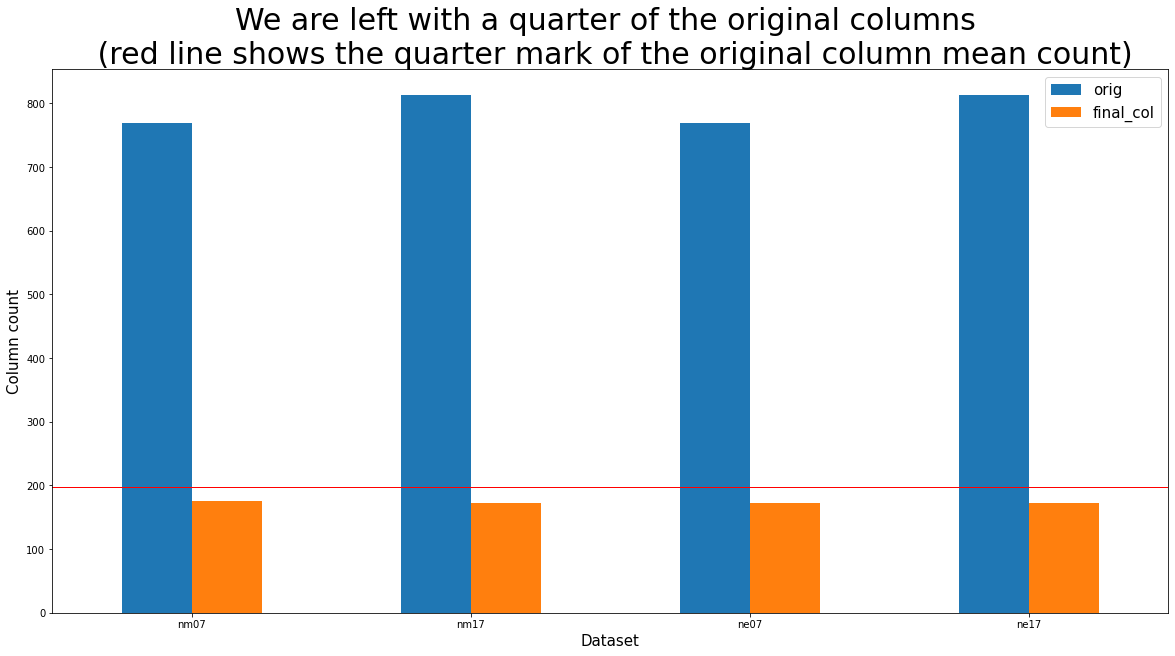

In [61]:
quarter = (all_df_att['orig'].mean())*.25

fig, ax = plt.subplots(figsize=(20,10))
all_df_att[['orig','final_col']].plot.bar(ax=ax)
plt.xlabel('Dataset',fontsize=15)
plt.ylabel('Column count',fontsize=15)
plt.xticks([0, 1, 2,3],labels=['nm07','nm17','ne07','ne17'],rotation=360)
plt.axhline(y=quarter,linewidth=1,color='r')
plt.legend(fontsize=15)
plt.title('We are left with a quarter of the original columns \n (red line shows the quarter mark of the original column mean count)',fontsize=30)
plt.savefig(r'C:\Users\efann\final_null.png');

In [63]:
nm07_target.reset_index(drop=True,inplace=True)
nm07 = nm07.assign(CAT_ELIG=nm07_target)
nm07 = nm07.astype('float64')
nm07.to_csv(r'C:\Users\efann\clean_nm07.csv',index=None)

In [64]:
nm17_target.reset_index(drop=True,inplace=True)
nm17 = nm17.assign(CAT_ELIG=nm17_target)
nm17 = nm17.astype('float64')
nm17.to_csv(r'C:\Users\efann\clean_nm17.csv',index=None)

In [65]:
ne07_target.reset_index(drop=True,inplace=True)
ne07 = ne07.assign(CAT_ELIG=ne07_target)
ne07 = ne07.astype('float64')
ne07.to_csv(r'C:\Users\efann\clean_ne07.csv',index=None)

In [66]:
ne17_target.reset_index(drop=True,inplace=True)
ne17 = ne17.assign(CAT_ELIG=ne17_target)
ne17 = ne17.astype('float64')
ne17.to_csv(r'C:\Users\efann\clean_ne17.csv',index=None)